## 練習問題

In [1]:
#普通の方法
s = 0
for x in range(1,51):
    s += x
print(s)

#sumを使う
print(sum(range(1,51)))

#generator式を使う
print(sum(x for x in range(1,51)))

#reduceを使う
import functools
print(functools.reduce(lambda x,y: x+y, range(1,51)))

1275
1275
1275
1275


In [2]:
import sympy as sp
sp.init_printing()

s = sp.Symbol('s')

p1 = sp.solve(2 * s**2 +5*s+3, s)
p2 = sp.solve(s**3 +s**2+s+1, s)

p1, p2

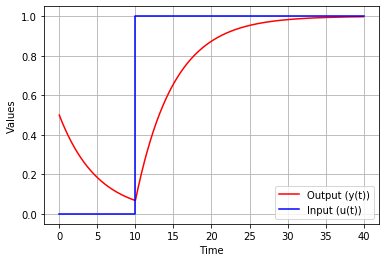

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t):
    if t < 10.0:
        u = 0
    else:
        u = 1
    dydt = (-y + u)/5.0
    return dydt

y0 = 0.5
t = np.arange(0, 40, 0.04)
y = odeint(system, y0, t)

fig, ax = plt.subplots() # FigureとAxesオブジェクトの作成
ax.plot(t, y, 'r-', label='Output (y(t))')
ax.plot([0, 10, 10, 40], [0, 0, 1, 1], 'b-', label='Input (u(t))')
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.grid()
ax.legend(loc='best')

In [5]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

### 1次遅れ系のステップ応答

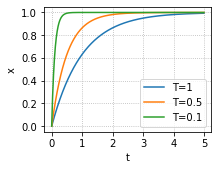

In [6]:
fig, ax = plt.subplots(figsize=(3, 2.3))

K = 1
T = (1, 0.5, 0.1)
for i in range(len(T)):
    y, t = step(tf([0, K], [T[i], 1]), np.arange(0, 5, 0.01))
    ax.plot(t, y, label='T='+str(T[i]))

ax.set_xticks(np.linspace(0, 5, 6))
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.legend()
ax.grid(ls=':')

### 1次遅れ系の周波数応答

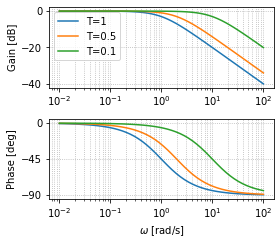

In [7]:
K = 1
T = (1, 0.5, 0.1)

fig, ax = plt.subplots(2,1,figsize=(4,3.5))

for i in range(len(T)):
    P = tf([0, K],[T[i], 1])
    gain, phase, w = bode(P, logspace(-2,2), Plot=False)
    
    ax[0].semilogx(w, 20*np.log10(gain), label='T='+str(T[i]))
    ax[1].semilogx(w, phase*180/np.pi, label='T='+str(T[i]))
 
ax[1].set_ylim(-95,5)
ax[1].set_yticks([-90,-45,0])
ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
ax[0].legend()

fig.tight_layout()

### 2次遅れ系のステップ応答

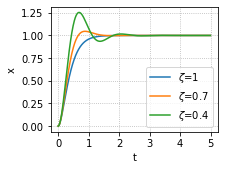

In [8]:
fig, ax = plt.subplots(figsize=(3, 2.3))

zeta = (1, 0.7, 0.4)
omega_n = 5
for i in range(len(zeta)):
    P = tf([0, omega_n**2], [1, 2*zeta[i]*omega_n, omega_n**2])
    y, t = step(P, np.arange(0, 5, 0.01))
    
    ax.plot(t, y, label='$\zeta$='+str(zeta[i]))

ax.set_xticks(np.arange(0, 5.2, step=1.0))
ax.set_yticks(np.arange(0, 1.3, step=0.25))
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.legend()
ax.grid(ls=':')

### 2次遅れ系の周波数応答

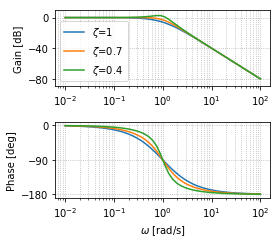

In [18]:
fig, ax = plt.subplots(2,1,figsize=(4,3.5))

zeta = (1, 0.7, 0.4)
omega_n = 1

for i in range(len(zeta)):
    P = tf([0,omega_n**2], [1, 2*zeta[i]*omega_n, omega_n**2])
    gain, phase, w = bode(P, logspace(-2,2), Plot=False)
    
    ax[0].semilogx(w, 20*np.log10(gain), label='$\zeta$='+str(zeta[i]))
    ax[1].semilogx(w, phase*180/np.pi, label='$\zeta$='+str(zeta[i]))

ax[0].set_ylim(-90,10)
ax[0].set_yticks([-80,-40,0])
ax[1].set_ylim(-190,10)
ax[1].set_yticks([-180,-90,0])
ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
ax[0].legend()

fig.tight_layout()

### 1次遅れ系，2次遅れ系のナイキスト線図

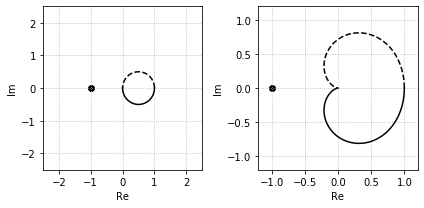

In [9]:
fig, ax = plt.subplots(1,2, figsize=(6, 3))

# １次遅れ系
P = tf([0, 1],[1, 1])
x, y, _ = nyquist(P, logspace(-3,5,1000), Plot=False)
ax[0].plot(x, y, color='k')
ax[0].plot(x, -y, ls='--', color='k')
ax[0].scatter(-1, 0, color='k')


# 2次遅れ系
P = tf([0, 1],[1, 1.4, 1])
x, y, _ = nyquist(P, logspace(-3,5,1000), Plot=False)
ax[1].plot(x, y, color='k')
ax[1].plot(x, -y, ls='--', color='k')
ax[1].scatter(-1, 0, color='k')

ax[0].set_xlim(-2.5, 2.5)
ax[0].set_ylim(-2.5, 2.5)
ax[0].grid(ls=':')
ax[0].set_xlabel('Re')
ax[0].set_ylabel('Im')

ax[1].set_xlim(-1.2, 1.2)
ax[1].set_ylim(-1.2, 1.2)
ax[1].grid(ls=':')
ax[1].set_xlabel('Re')
ax[1].set_ylabel('Im')

fig.tight_layout()